Assignment: Flowers Recognition
Dataset Description:

This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize plants from the photo.

Attribute Information:
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels.
Also explore how to resize images in tensorflow and then resize all the images to a same size.
This is a Multiclass Classification Problem.

WORKFLOW :

Load Data

Split into 60 and 40 ratio.

Encode labels.

Create Model

Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)

Train the Model.
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

Prediction should be > 85%

Evaluation Step

Prediction


Tried to get to 85% couldn't get there no matter how hard I tried. In the end we sat togethere even then it wasn't happening. Need teachers help on this.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers, Sequential, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
val_batch = 10
train_batch = 20
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.4,
        zoom_range=0.3,
        validation_split=0.4,
        horizontal_flip=True,
        )
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Assignment3_DL/flowers',
        target_size=(180, 180),
        batch_size=train_batch,
        class_mode='categorical',
        subset = 'training',
        shuffle = True
        )
validation_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Assignment3_DL/flowers',
        target_size=(180, 180),
        batch_size=val_batch,
        class_mode='categorical',
        subset = 'validation',
        shuffle= True)


Found 2597 images belonging to 5 classes.
Found 1727 images belonging to 5 classes.


In [ ]:
len(validation_generator[100])

2

In [ ]:
validation_generator[100][1]

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
validation_generator.labels

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
len(train_generator[100][1])

20

In [ ]:

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'):
  result = model.fit(train_generator,steps_per_epoch=30,epochs=30,validation_data=validation_generator,validation_steps=30)

Epoch 1/30
30/30 [==============================] - 9s 299ms/step - loss: 1.5890 - accuracy: 0.2116 - val_loss: 1.3261 - val_accuracy: 0.3633
Epoch 2/30
30/30 [==============================] - 9s 295ms/step - loss: 1.3555 - accuracy: 0.3988 - val_loss: 1.3063 - val_accuracy: 0.4033
Epoch 3/30
30/30 [==============================] - 9s 295ms/step - loss: 1.2989 - accuracy: 0.4442 - val_loss: 1.1597 - val_accuracy: 0.5333
Epoch 4/30
30/30 [==============================] - 9s 291ms/step - loss: 1.1394 - accuracy: 0.4965 - val_loss: 1.1131 - val_accuracy: 0.5100
Epoch 5/30
30/30 [==============================] - 9s 290ms/step - loss: 1.0829 - accuracy: 0.5847 - val_loss: 1.1457 - val_accuracy: 0.5233
Epoch 6/30
30/30 [==============================] - 9s 292ms/step - loss: 1.1346 - accuracy: 0.5446 - val_loss: 1.1595 - val_accuracy: 0.5400
Epoch 7/30
30/30 [==============================] - 9s 292ms/step - loss: 1.0820 - accuracy: 0.5692 - val_loss: 1.1291 - val_accuracy: 0.6000
Epoch 

In [ ]:
model.evaluate(validation_generator)

173/173 [==============================] - 16s 94ms/step - loss: 0.8584 - accuracy: 0.6786


[0.8583952784538269, 0.678633451461792]

In [ ]:
x = result.history.keys()
x

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

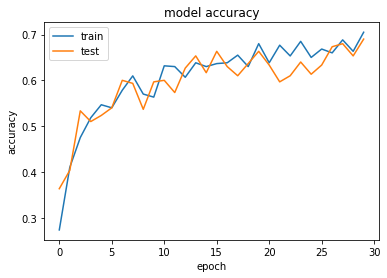

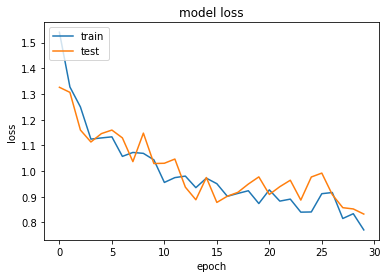

In [ ]:

# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred1 = model.predict(validation_generator)

In [ ]:
y_pred1.shape

(1727, 5)

In [ ]:
list1 = []
for i in range(0,len(validation_generator)):
  for j in range(0,val_batch):
    try:
      list1.append(validation_generator[i][1][j].tolist())
    except:
      break

In [ ]:
np.argmax(y_pred1, axis=1)[0:30]

array([3, 1, 1, 0, 4, 1, 3, 3, 3, 2, 2, 3, 0, 4, 1, 3, 1, 3, 2, 1, 2, 2,
       4, 4, 0, 1, 0, 3, 4, 2])

In [ ]:
np.argmax(list1[0:30],axis=1)

array([0, 4, 0, 2, 1, 1, 1, 1, 2, 3, 3, 1, 3, 0, 1, 4, 3, 1, 3, 1, 4, 2,
       1, 4, 1, 3, 3, 2, 0, 3])